# Entropy of Mixing
### Neshyba, 2021

## Key equations
Key equations for this exercise are:

1. The n-C-V ("moles-concentration-volume) equation,

$$
n = C \times V
$$

2. The dilution equation,

$$
C_f/C_i = V_i/V_f
$$

3. The E-ICE ("equal initial concentrations entropy") equation, 

$$
\Delta S = -n_{tot}R \times [\chi_A ln(\chi_A) + \chi_B ln(\chi_B) + ...]
$$

## Learning Goals
1. Gain familiarity with basic solution equations involving moles, concentrations, and mole fractions.
1. Gain familiarity with how concentrations change with dilution
1. Gain familiarity with the entropy changes attending dilution and mixing of solutions 

In [1]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

In [2]:
R = AssignQuantity(8.314,'J/mol/K')

### Finding moles
Calculate the number of moles of solute in $20 \ mL$ of a $0.5$ <u>M</u> solution.

In [3]:
### BEGIN SOLUTION
C = AssignQuantity(0.5,'mol/L')
V = AssignQuantity(20,'mL')
V.ito('L')
n = C*V
print(n)
### END SOLUTION

0.01 mole


### Finding the entropy of dilution
Calculate the solute concentration after $20 \ mL$ of a $0.5$ <u>M</u> solution is diluted to $100 \ mL$. Then calculate the entropy change associated with this dilution.

In [4]:
### BEGIN SOLUTION
C1 = AssignQuantity(0.5,'mol/L')
V1 = AssignQuantity(20,'mL')
V2 = AssignQuantity(100,'mL')
C2 = C1 * V1/V2
print (C2)

DeltaS = -n*R*np.log(C2/C1)
print(DeltaS)

### END SOLUTION

0.1 mole / liter
0.1338086680397711 joule / kelvin


### Finding the entropy of mixing
Use the "mole fraction" equation to calculate the entropy change when $10 \ mL$ of A and $20 \ mL$ of B (both 1 <u>M</u> solutions) are combined.

In [5]:
### BEGIN SOLUTION
C = AssignQuantity(1,'mol/L')
VA = AssignQuantity(10,'L')/1000; print(VA)
VB = AssignQuantity(20,'L')/1000; print(VB)
nA = C*VA
nB = C*VB
ntot = nA+nB
chiA = nA/ntot; print(chiA)
chiB = nB/ntot; print(chiB)
DeltaS = -ntot*R*(chiA*np.log(chiA)+chiB*np.log(chiB)); print(DeltaS)
### END SOLUTION

0.01 liter
0.02 liter
0.33333333333333337 dimensionless
0.6666666666666667 dimensionless
0.1587593638560922 joule / kelvin


### Entropy of mixing for a range of volume ratios
Starting with the following volumes, calculate the entropy of mixing, assuming 1 <u>M</u> initial concentrations and volumes ranging in the following ways:

$V_A = 0$ to $1 \ L$  
$V_B = 1$ to $0 \ L$


/usr/local/lib/python3.6/dist-packages/pint/numpy_func.py:303: RuntimeWarning: divide by zero encountered in log
  result_magnitude = func(*stripped_args, **stripped_kwargs)
/usr/local/lib/python3.6/dist-packages/pint/quantity.py:1237: RuntimeWarning: invalid value encountered in multiply
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Entropy of mixing using E-ICE')

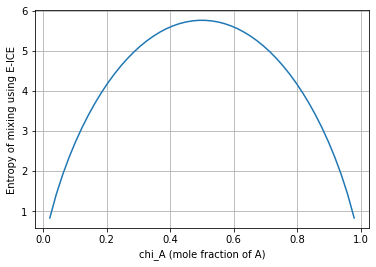

In [6]:
### BEGIN SOLUTION
VA = AssignQuantity(np.linspace(0,1),'L')
VB = AssignQuantity(np.linspace(1,0),'L')
C = AssignQuantity(1,'mol/L')
ntot = C*AssignQuantity(1,'L')
nA = C*VA
nB = C*VB
ntot = nA + nB
chiA = nA/ntot
chiB = nB/ntot
DeltaS = -ntot*R*(chiA*np.log(chiA)+chiB*np.log(chiB))
plt.figure()
plt.plot(chiA,DeltaS)
plt.grid('True')
plt.xlabel('chi_A (mole fraction of A)')
plt.ylabel('Entropy of mixing using E-ICE')
### END SOLUTION

### Pause for analysis
What's the maximum entropy of mixing (with units)? What proportions of reagents give rise to it?

The maximum is 8.8 J/K. It occurs with equal portions of A and B.